### Many-body Entanglement and Tensor Networks
Tutorials based on the 2017 Perimeter Scholar International Condensed Matter Review course taught by Guifre Vidal

# <span style="color:#0C45A9">Python tutorial 4</span>

## 4.1. Power method and sparse multiplication

### 4.1.1. Local $N=2$ quantum Ising Hamiltonian

We define the Hamiltonian for the quantum Ising model as per previous tutorials. We will only build it for $N=2$ and use this in the sparse multiplication method.

In [1]:
import numpy as np

def qIsingH_2(h, bc = 1): #bc = 1 PBC, =-1 APBC
    I = np.eye(2) #2x2 identity matrix
    X = np.array([[0,1],[1,0]]) #Pauli-X
    Z = np.array([[1,0],[0,-1]]) #Pauli-Z
    XX = np.kron(X,X) 
    H = -XX - (h/2)*(np.kron(Z,I) + np.kron(I,Z)) #Hamiltonian for N=2
    
    return H

In [2]:
H_2 = qIsingH_2(1)

D, U = np.linalg.eig(H_2) #diagonalise fully
E_shift = np.sort(D)[-1]

H_2 -= E_shift*np.eye(4)

### 4.1.2. Sparse multiplication of local Hamiltonian

The function below takes in an arbitrary length vector $\Psi$ and acts on it with the local term $H$, which corresponds to the $N=2$ Ising model Hamiltonian.

In [3]:
def sparse_multiplication(Psi, H):
    L = len(Psi)  # Dimension of the vector space
    N = round(np.log2(L))  # Number of spins
    HPsi = np.zeros(L)
    for n in range(1, (N+1)):
        Psi = np.reshape(Psi,(4,2**(N-2)))
        HPsi = np.reshape(HPsi,(4,2**(N-2)))
        HPsi += H.dot(Psi)                 
        Psi = np.reshape(Psi,(2,2**(N-1)))
        HPsi = np.reshape(HPsi,(2,2**(N-1)))
        Psi = Psi.transpose(1,0)
        HPsi = HPsi.transpose(1,0)
    
    Psi = np.reshape(Psi,L)
    HPsi = np.reshape(HPsi, L)
    return HPsi

### 4.1.3. Power method

In [ ]:
def power_method(num_steps, Psi, H_2):
    E_evolution = []
    for step in range(num_steps):
        HPsi = sparse_multiplication(Psi, H_2)
        E_step = np.real((Psi.conj().T).dot(HPsi))
        E_evolution.append(E_step)
        Psi = HPsi/np.linalg.norm(HPsi)
    return np.array(E_evolution)

### 4.1.4. Evaluate and plot

In [4]:
N = 20
Psi_0 = np.random.rand(2**N)
Psi_0 = Psi_0/np.linalg.norm(Psi_0)

num_steps = 30
E_evolution = power_method(num_steps, Psi_0, H_2)
E_evolution += E_shift*N

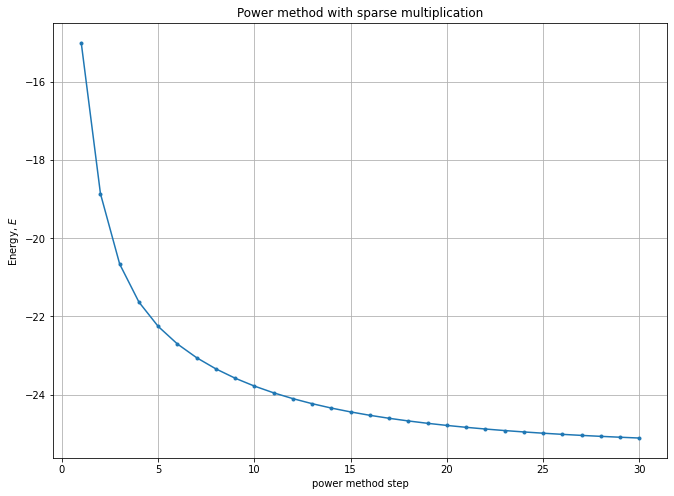

In [6]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.title("Power method with sparse multiplication")
plt.grid()
plt.ylabel("Energy, $E$")
plt.xlabel("power method step")
plt.plot(np.arange(1,num_steps+1), E_evolution, ls = '-', marker = '.')
plt.rcParams["figure.figsize"] = (11,8)
plt.show()